In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read file

df_original = pd.read_csv(r'C:\Users\acer\Downloads\Pradnya_Docs\Feynn AI\2nd Project\Datasets\EV_Market_Data.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = df_original.copy()

In [3]:
df.head()

,Sr.No.,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,1,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,2,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,3,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,4,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,5,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


#### Data Pre-Processing 

In [4]:
df.isnull().sum()

Sr.No.                                                                  0
Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of EV would you prefer?                          0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV           

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Sr.No.', 'Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [7]:
df.shape

(1000, 15)

In [8]:
df.info

<bound method DataFrame.info of      Sr.No.  Age       City Profession Marital Status      Education  \
0         1   30      Nabha       None         Single       Graduate   
1         2   27       Pune       None         Single       Graduate   
2         3   32   Kashipur       None         Single       Graduate   
3         4   55       Pune   Business         Single       Graduate   
4         5   26     Satara       None         Single       Graduate   
..      ...  ...        ...        ...            ...            ...   
995     996   31       Pune       None        Married       Graduate   
996     997   29       Pune       None        Married  Post Graduate   
997     998   30     Mumbai   Business         Single       Graduate   
998     999   24  Ahmedabad       None        Married       Graduate   
999    1000   30       Pune   Business         Single       Graduate   

     No. of Family members  Annual Income  \
0                        5    1193875.647   
1            

In [9]:
df = df.drop('Sr.No.', axis=1)

In [10]:
df.head(2)

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"


In [11]:
df.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000,1000.000,1000.000,1000.000
mean,31.800,4.118,2258341.824,3.349
std,11.295,1.470,999355.758,0.888
min,15.000,0.000,-376150.863,2.000
25%,26.000,4.000,1782115.520,2.000
50%,29.000,4.000,2329246.376,4.000
75%,31.000,5.000,2753169.612,4.000
max,118.000,8.000,12821282.030,4.000


In [12]:
df['Age'].unique()

array([ 30,  27,  32,  55,  26,  28,  23,  25,  43,  59,  21,  29,  56,
        70,  50,  24,  61,  39,  31,  40,  18,  58,  22,  96,  64,  52,
        54,  42,  49,  57,  46,  36,  20,  19,  65,  17,  60,  44,  45,
        47,  82,  33,  37,  48,  69,  67,  86,  62,  66,  34,  63,  41,
        68,  16,  53,  15, 118,  38], dtype=int64)

In [13]:
df['City'].unique()

array(['Nabha', 'Pune', 'Kashipur', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani', 'Nellore', 'Banglore', 'Faridabad',
       'Nagpur', 'Chandrapur', 'Chennai', 'Gurugram', 'Nashik',
       'Bengaluru', 'Hakdwani', 'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal',
       'Rewari', 'New Delhi', 'Serampore', 'Jhansi', 'Jalandhar',
       'nashik'], dtype=object)

In [14]:
df["City"] = df["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df["City"] = df["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df["City"] = df["City"].replace({"Banglore ":"Bengaluru"})
df["City"] = df["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df["City"] = df["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df["City"] = df["City"].replace({"nashik":"Nashik"})

In [15]:
df['No. of Family members'].unique()

array([5, 4, 3, 2, 8, 6, 0, 1, 7], dtype=int64)

In [16]:
df['How much money could you spend on an Electronic vehicle?'].unique()

array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '700000', '>25 lakhs',
       '2000000', '1200000', '1500000'], dtype=object)

In [17]:
df.columns

Index(['Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

#### Data Visualization

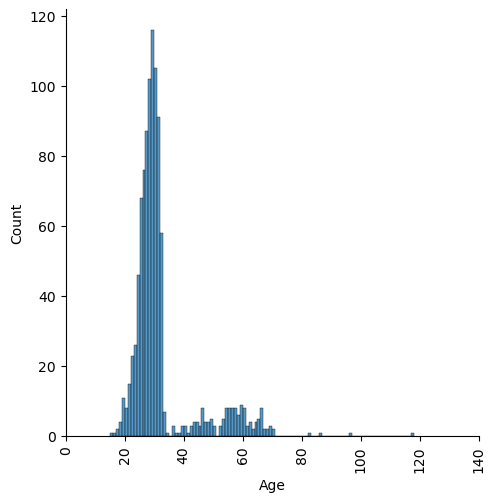

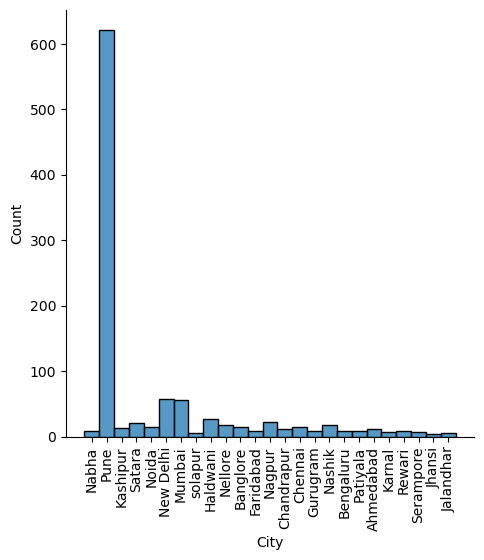

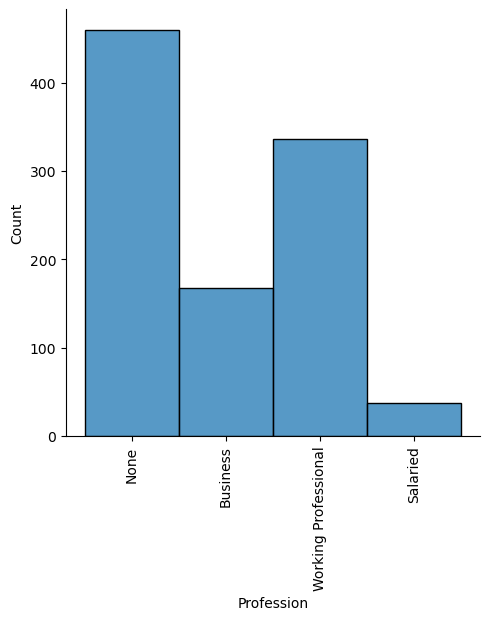

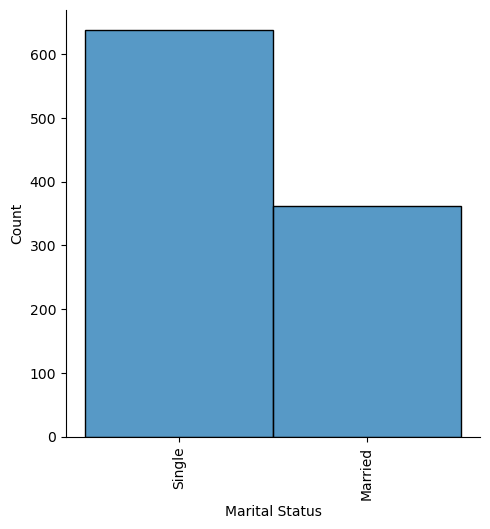

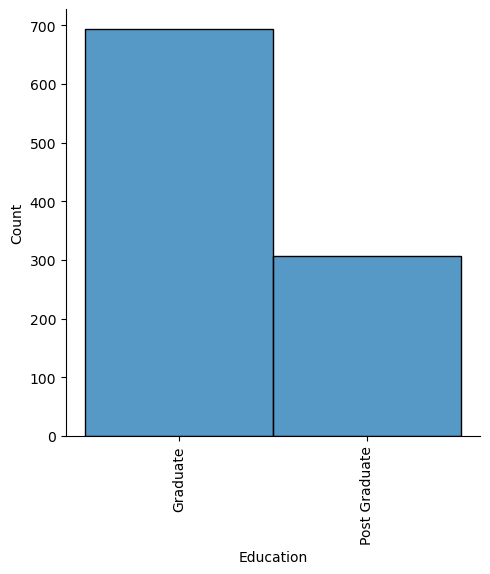

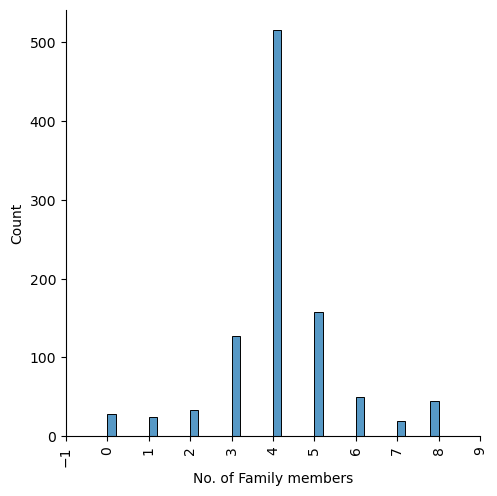

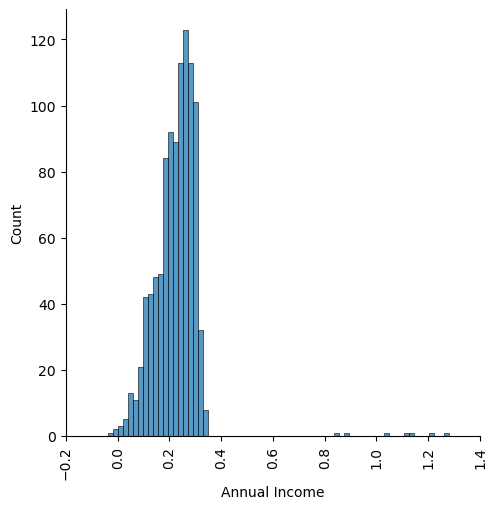

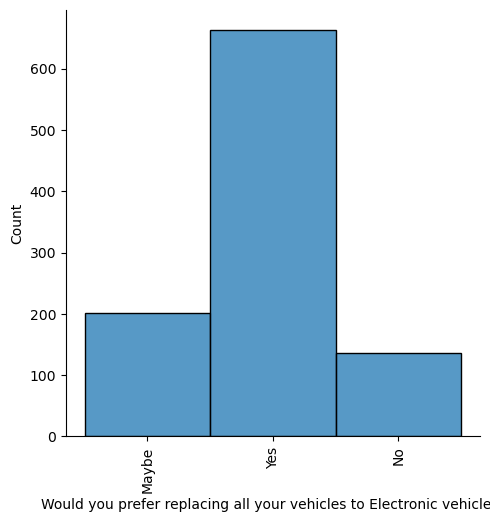

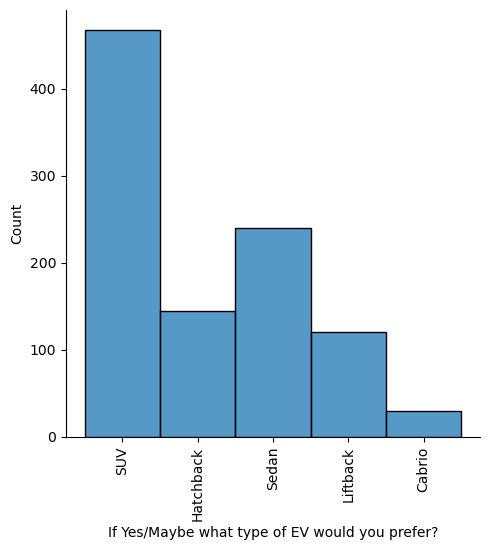

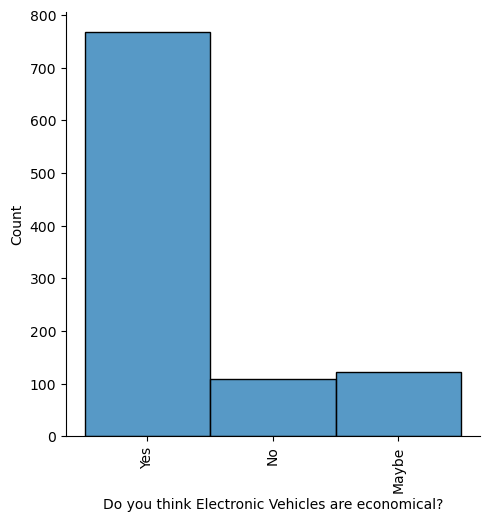

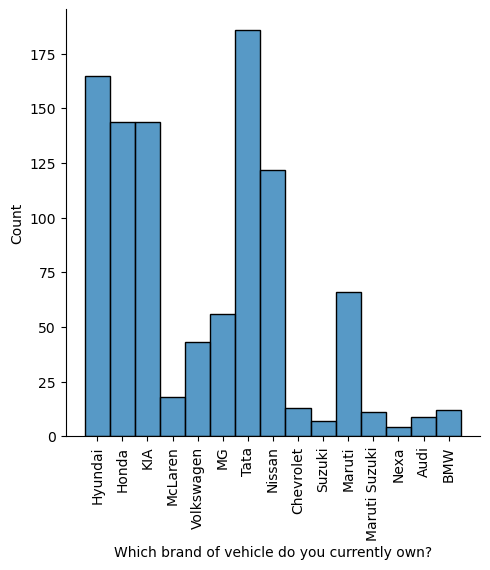

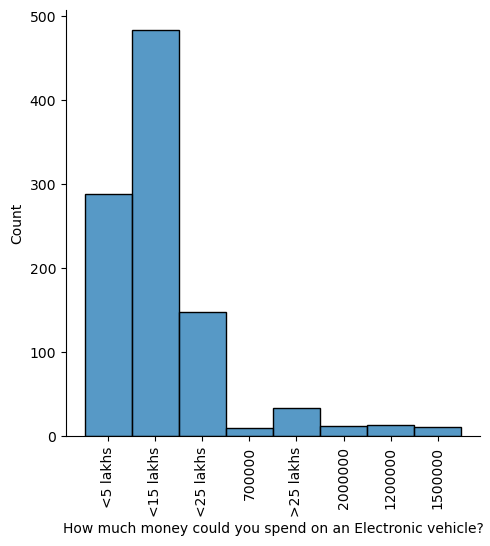

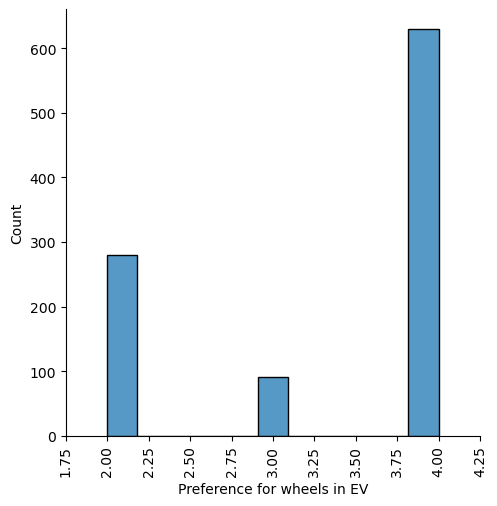

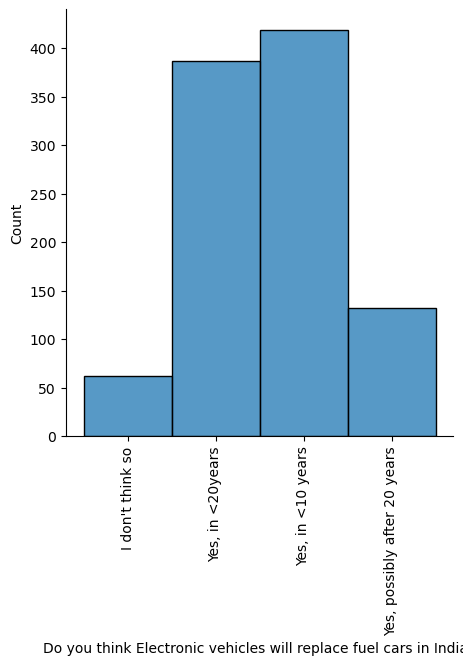

In [18]:
for col in df.columns:
    ax= sns.displot(df[col])
    ax.set_xticklabels(rotation=90)

Most people prefer 4 wheels vehicle. Most people believe Electronic vehicle will replace fuel cars in India in less than 20 years.

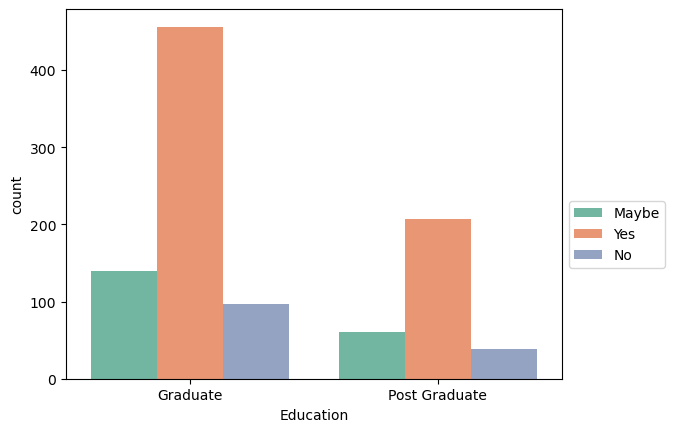

In [19]:
sns.countplot(x ='Education', hue = 'Would you prefer replacing all your vehicles to Electronic vehicles?',  data = df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

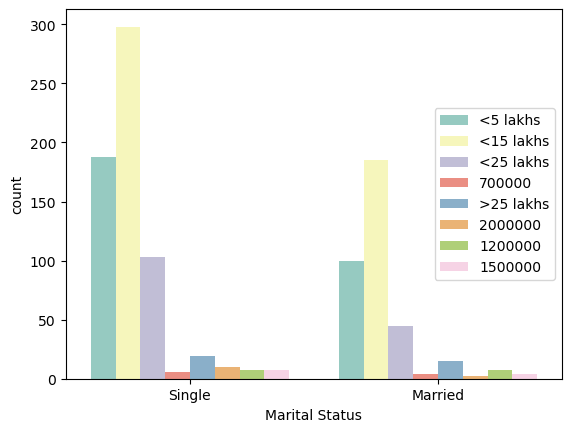

In [20]:
sns.countplot(x ='Marital Status', hue = 'How much money could you spend on an Electronic vehicle?',  data = df, palette = 'Set3')
plt.legend(loc='center right')
plt.show()

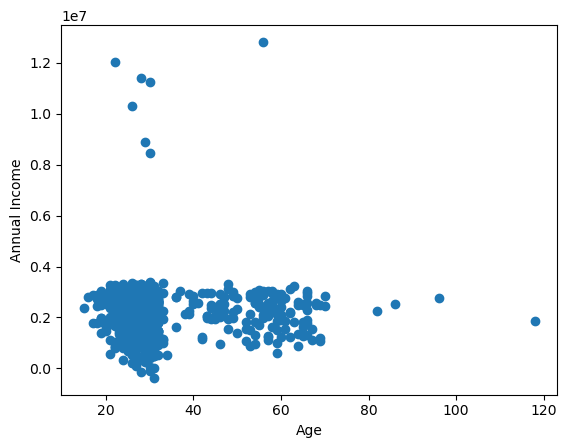

In [21]:
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.scatter(df['Age'],df['Annual Income'])

<Axes: xlabel='Age', ylabel='count'>

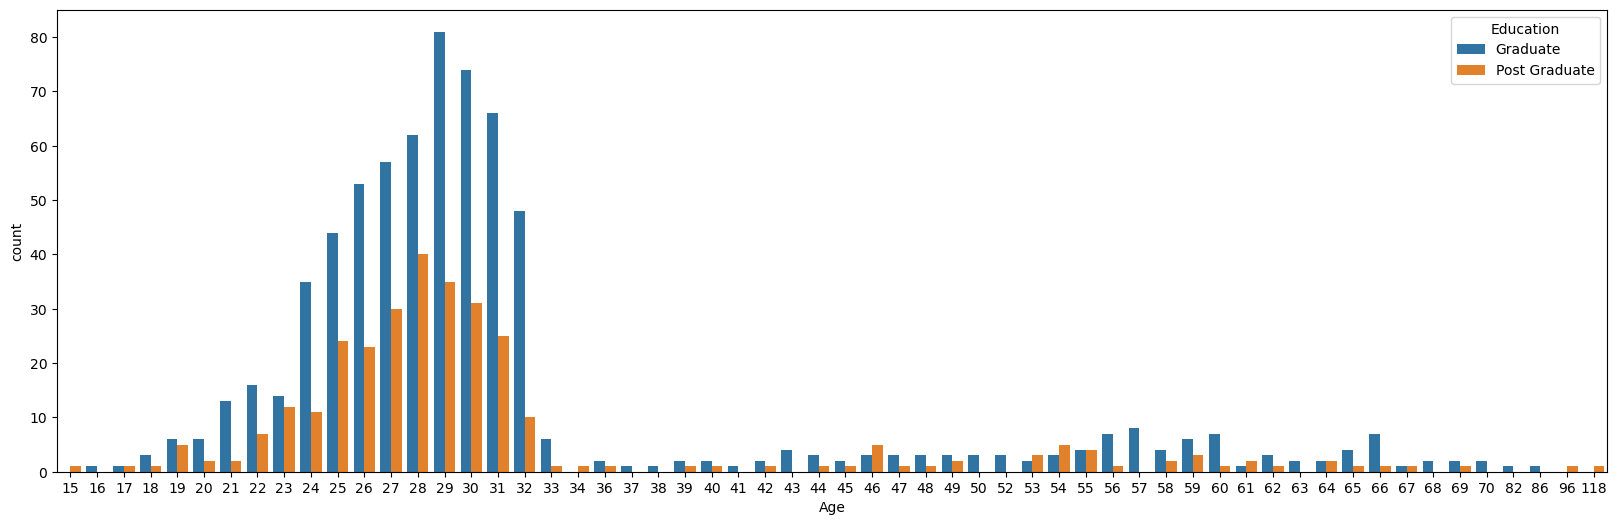

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=df, hue="Education")

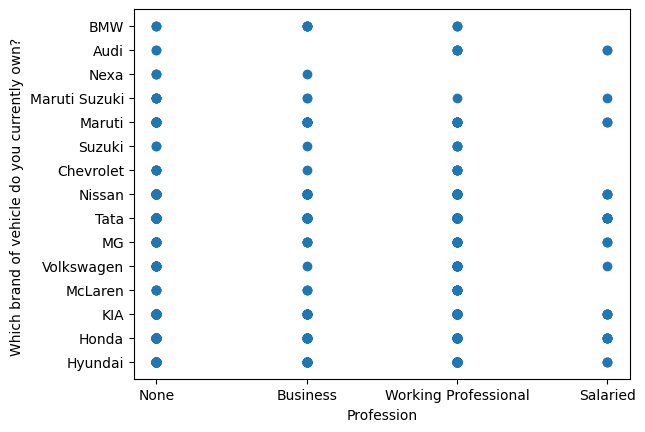

In [23]:
plt.xlabel('Profession')
plt.ylabel('Which brand of vehicle do you currently own? ')
plt.scatter(df['Profession'],df['Which brand of vehicle do you currently own?'])

<Axes: xlabel='Which brand of vehicle do you currently own?', ylabel='count'>

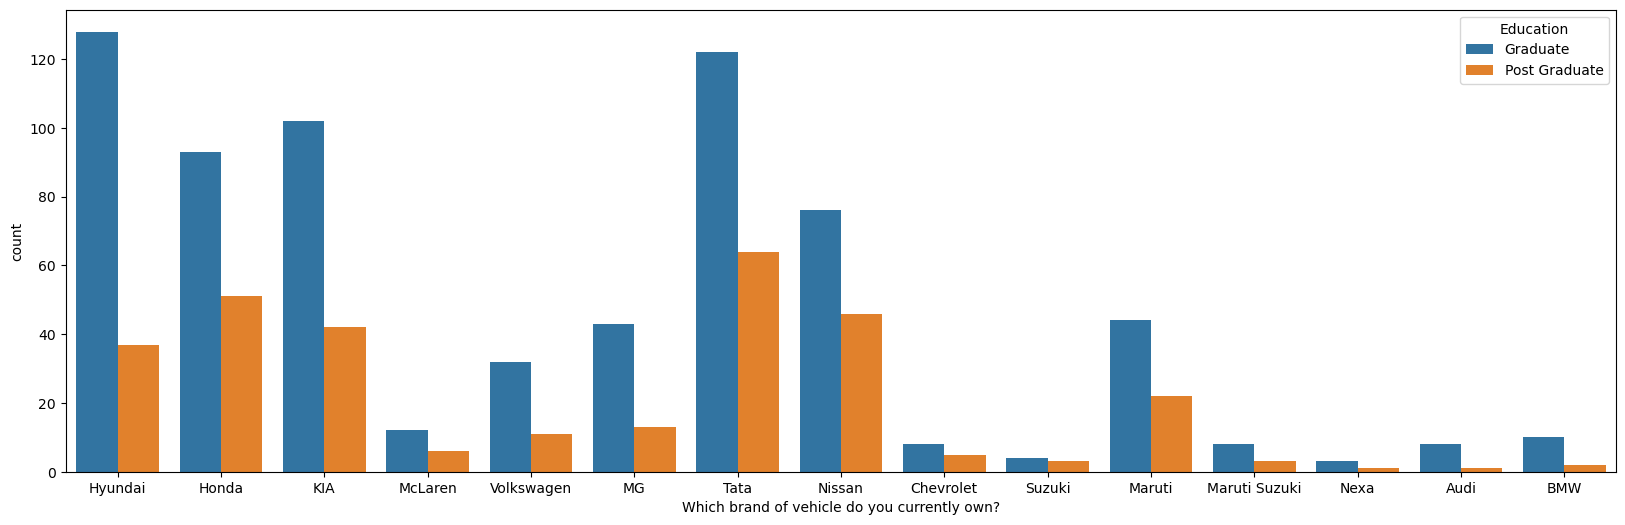

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x="Which brand of vehicle do you currently own?", data=df, hue="Education")

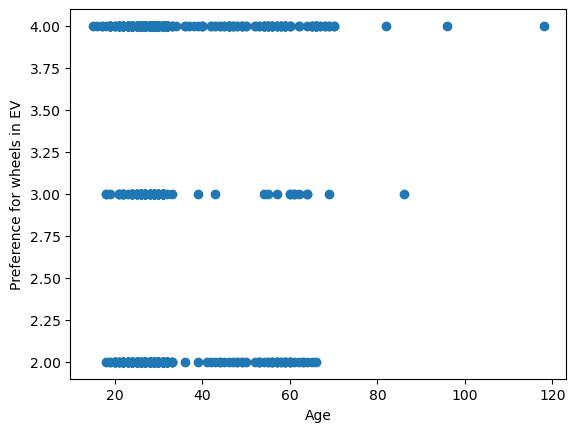

In [25]:
plt.xlabel('Age')
plt.ylabel('Preference for wheels in EV')
plt.scatter(df['Age'],df['Preference for wheels in EV'])

In [26]:
df.corr()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
Age,1.000,0.024,-0.012,0.028
No. of Family members,0.024,1.000,0.028,-0.021
Annual Income,-0.012,0.028,1.000,-0.023
Preference for wheels in EV,0.028,-0.021,-0.023,1.000


<Axes: >

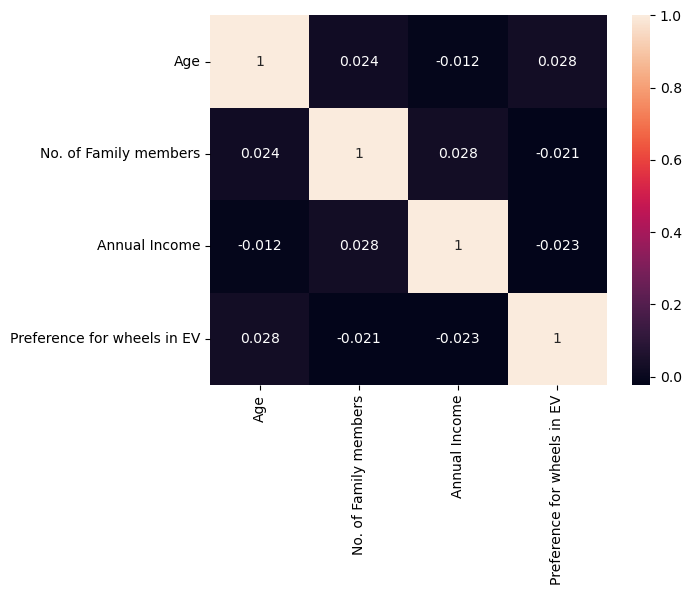

In [27]:
#heatmap of correlation

sns.heatmap(df.corr(), annot=True)

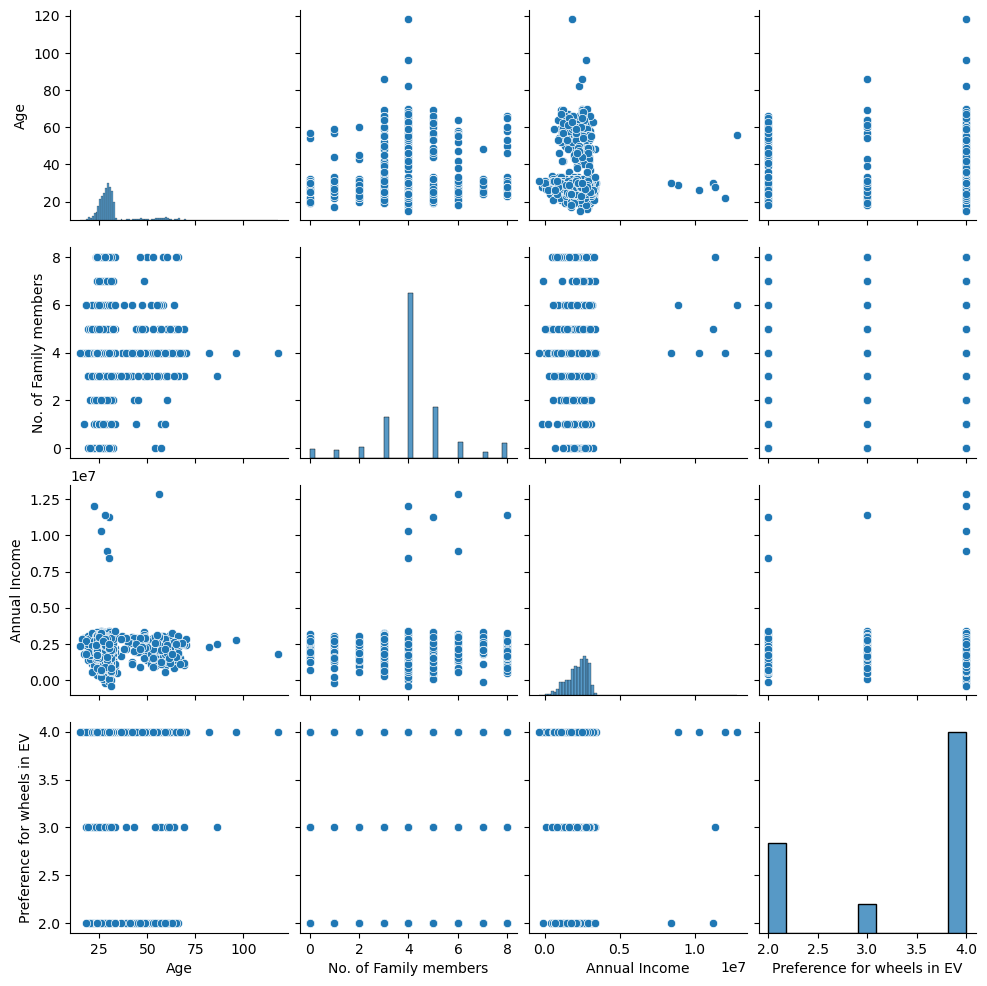

In [28]:
sns.pairplot(df)

In [29]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))

In [30]:
df.columns

Index(['Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [32]:
df['City']= label_encode(df,'City')
df['Profession']= label_encode(df,'Profession')
df['Marital Status']= label_encode(df,'Marital Status')
df['Education']= label_encode(df,'Education')
df['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encode(df,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df['If Yes/Maybe what type of  EV would you prefer?']= label_encode(df,'If Yes/Maybe what type of EV would you prefer?')
df['Do you think Electronic Vehicles are economical?']= label_encode(df,'Do you think Electronic Vehicles are economical?')
df['Which brand of vehicle do you currently own?']= label_encode(df,'Which brand of vehicle do you currently own?')
df['Do you think Electronic vehicles will replace fuel cars in India?']= label_encode(df,'Do you think Electronic vehicles will replace fuel cars in India?')
df['How much money could you spend on an Electronic vehicle?']= label_encode(df,'How much money could you spend on an Electronic vehicle?')

In [33]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,If Yes/Maybe what type of EV would you prefer?
0,30,5,1,1,0,5,1193875.647,0,SUV,2,4,6,2,0,3
1,27,13,1,1,0,4,1844540.398,2,SUV,2,3,4,4,2,3
2,32,3,1,1,0,4,2948150.113,2,Hatchback,2,5,4,4,2,1
3,55,13,0,1,0,3,2832379.739,0,Hatchback,1,4,6,4,1,1
4,26,15,1,1,0,4,2638750.576,2,Sedan,2,9,4,4,2,4


In [34]:
df['If Yes/Maybe what type of EV would you prefer?'].unique()

array(['SUV', 'Hatchback', 'Sedan', 'Liftback', 'Cabrio'], dtype=object)

In [35]:
# Define the mapping of categories to numerical labels
category_mapping = {'SUV': 0, 'Hatchback': 1, 'Sedan': 2, 'Liftback': 3, 'Cabrio': 4}

# Apply the mapping to the specified column
df['If Yes/Maybe what type of EV would you prefer?'] = df['If Yes/Maybe what type of EV would you prefer?'].map(category_mapping)

In [36]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,If Yes/Maybe what type of EV would you prefer?
0,30,5,1,1,0,5,1193875.647,0,0,2,4,6,2,0,3
1,27,13,1,1,0,4,1844540.398,2,0,2,3,4,4,2,3
2,32,3,1,1,0,4,2948150.113,2,1,2,5,4,4,2,1
3,55,13,0,1,0,3,2832379.739,0,1,1,4,6,4,1,1
4,26,15,1,1,0,4,2638750.576,2,2,2,9,4,4,2,4


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
y = df['City']
X = df.drop(['City'],axis=1,inplace = True)

In [39]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [40]:
X = df.iloc[:,:-1]

In [41]:
calc_vif(X)

,variables,VIF
0,Age,7.943
1,Profession,2.893
2,Marital Status,2.707
3,Education,1.446
4,No. of Family members,8.173
5,Annual Income,5.705
6,Would you prefer replacing all your vehicles t...,4.109
7,If Yes/Maybe what type of EV would you prefer?,1.828
8,Do you think Electronic Vehicles are economical?,6.251
9,Which brand of vehicle do you currently own?,4.155


VIF equal to 1 = variables are not correlated, VIF between 1 and 5 = variables are moderately correlated, VIF greater than 5 = variables are highly correlated

#### K-Means Clustering Model

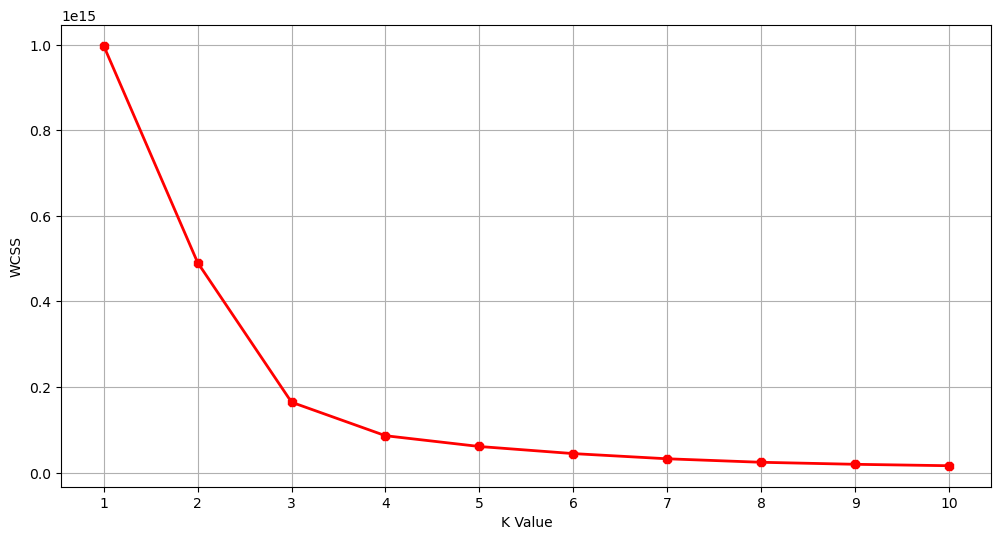

In [42]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=28)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

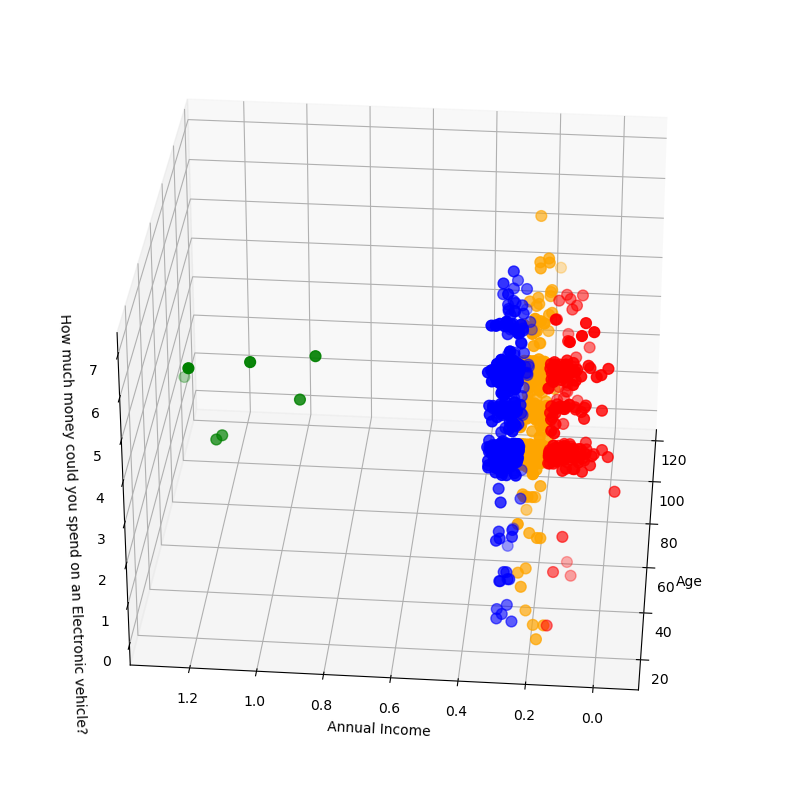

In [43]:
km = KMeans(n_clusters=4, random_state=28)
clusters = km.fit_predict(df)
df["Cluster"] = clusters

df_original["Cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income"][df.Cluster == 0], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income"][df.Cluster == 1], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income"][df.Cluster == 2], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income"][df.Cluster == 3], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('How much money could you spend on an Electronic vehicle?')
plt.show()

In [44]:
df1=df_original.copy()
df1.head(2)

,Sr.No.,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,1,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so,1
1,2,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",3


In [45]:
df1["City"] = df1["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df1["City"] = df1["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df1["City"] = df1["City"].replace({"Banglore ":"Bengaluru"})
df1["City"] = df1["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df1["City"] = df1["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df1["City"] = df1["City"].replace({"nashik":"Nashik"})

In [46]:
df1['Cluster'].value_counts() 

0    430
3    368
1    195
2      7
Name: Cluster, dtype: int64

More customers belong to Cluster 0 & 3, Cluster 2 & 1 have very less customers

In [47]:
#segregrating each cluster

Cluster_0 = df1[df1.Cluster==0]
Cluster_1 = df1[df1.Cluster==1]
Cluster_2 = df1[df1.Cluster==2]
Cluster_3 = df1[df1.Cluster==3]
Cluster_2.shape

(7, 16)

In [48]:
[Cluster_0['Age'].value_counts().head(3), 
 Cluster_1['Age'].value_counts().head(3), 
 Cluster_2['Age'].value_counts().head(3), 
 Cluster_3['Age'].value_counts().head(3)]

[29    47
 28    43
 30    43
 Name: Age, dtype: int64,
 31    28
 30    23
 29    23
 Name: Age, dtype: int64,
 30    2
 26    1
 29    1
 Name: Age, dtype: int64,
 29    45
 28    42
 30    37
 Name: Age, dtype: int64]

Based on Cluster 0 & 3, Age group of 28-31 are to be targeted

In [49]:
[Cluster_0['City'].value_counts().head(),
 Cluster_1['City'].value_counts().head(), 
 Cluster_2['City'].value_counts().head(), 
 Cluster_3['City'].value_counts().head()]

[Pune         279
 New Delhi     28
 Mumbai        23
 Haldwani      10
 Nagpur         9
 Name: City, dtype: int64,
 Pune         107
 Mumbai        14
 New Delhi     11
 Haldwani       6
 Chennai        6
 Name: City, dtype: int64,
 Pune         4
 Mumbai       2
 Ahmedabad    1
 Name: City, dtype: int64,
 Pune         231
 New Delhi     18
 Mumbai        17
 Haldwani      11
 Satara         9
 Name: City, dtype: int64]

Pune & Mumbai are present in all the clusters, 
New Delhi & Haldwani are present in 3 of 4 clusters,
Satara & Bengaluru are present in 1 of the 4 clusters.

1. **Pune & Mumbai** are the most suitable location to start the early market in EV segment.
2. **New Delhi & Haldwani** should be next priority.
3. Followed by **Satara & Bengaluru.**

In [50]:
[Cluster_0['Profession'].value_counts().head(), 
 Cluster_1['Profession'].value_counts().head(), 
 Cluster_2['Profession'].value_counts().head(), 
 Cluster_3['Profession'].value_counts().head()]

[None                    207
 Working Professional    135
 Business                 73
 Salaried                 15
 Name: Profession, dtype: int64,
 None                    87
 Working Professional    68
 Business                32
 Salaried                 8
 Name: Profession, dtype: int64,
 None                    5
 Working Professional    1
 Business                1
 Name: Profession, dtype: int64,
 None                    161
 Working Professional    132
 Business                 61
 Salaried                 14
 Name: Profession, dtype: int64]

**Salaried** people are less interested in EV vehicles.

In [51]:
[Cluster_0['Annual Income'].mean(), 
 Cluster_1['Annual Income'].mean(), 
 Cluster_2['Annual Income'].mean(), 
 Cluster_3['Annual Income'].mean()]

[2812149.7606093017, 1097632.5625656925, 10737228.10357143, 2064995.8703315216]

**Cluster 0** customers have Higher Average Income **(Rs. 2812149.76)**, Cluster 1 & 2 have lower Average Income

In [52]:
[Cluster_0['Marital Status'].value_counts().head(), 
 Cluster_1['Marital Status'].value_counts().head(), 
 Cluster_2['Marital Status'].value_counts().head(), 
 Cluster_3['Marital Status'].value_counts().head()]

[Single     283
 Married    147
 Name: Marital Status, dtype: int64,
 Single     133
 Married     62
 Name: Marital Status, dtype: int64,
 Married    5
 Single     2
 Name: Marital Status, dtype: int64,
 Single     220
 Married    148
 Name: Marital Status, dtype: int64]

In [53]:
m=Cluster_3[Cluster_3['Marital Status']=='Single']
m['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Yes      147
Maybe     40
No        33
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

**Single** Status people should be Targeted.

In [54]:
[Cluster_0['No. of Family members'].value_counts().head(), 
 Cluster_1['No. of Family members'].value_counts().head(), 
 Cluster_2['No. of Family members'].value_counts().head(), 
 Cluster_3['No. of Family members'].value_counts().head()]

[4    231
 5     63
 3     59
 6     22
 2     14
 Name: No. of Family members, dtype: int64,
 4    88
 5    37
 3    22
 6    14
 8    12
 Name: No. of Family members, dtype: int64,
 4    3
 6    2
 5    1
 8    1
 Name: No. of Family members, dtype: int64,
 4    194
 5     57
 3     46
 8     22
 6     12
 Name: No. of Family members, dtype: int64]

**Family** with **3-5** members are more interested in EV.

In [ ]:
[Cluster_0['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_1['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_2['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_3['Which brand of vehicle do you currently own?'].value_counts().head()]

**Tata,Hyundai,Honda,KIA** are the Brands that Customers **own** most.
As per Automobile Domain Experts, further are the details about what each brand is well known for,
**Tata** - Robust, Safety, Affordable
**Hyundai** - Unique design, Comfort
**Honda** - Durability, Performance
**KIA** - Innovative Features, efficiency.

In [56]:
[Cluster_0['Education'].value_counts().head(),
 Cluster_1['Education'].value_counts().head(), 
 Cluster_2['Education'].value_counts().head(), 
 Cluster_3['Education'].value_counts().head()]

[Graduate         298
 Post Graduate    132
 Name: Education, dtype: int64,
 Graduate         130
 Post Graduate     65
 Name: Education, dtype: int64,
 Graduate         5
 Post Graduate    2
 Name: Education, dtype: int64,
 Graduate         260
 Post Graduate    108
 Name: Education, dtype: int64]

In [57]:
e=Cluster_3[Cluster_3['Education']=='Graduate']
e['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Yes      176
Maybe     50
No        34
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

In [58]:
y= df_original['Would you prefer replacing all your vehicles to Electronic vehicles?']
z= df_original['Cluster']
x = list(zip(y, z))

i = pd.DataFrame(x,columns=['Would you prefer replacing all your vehicles to Electronic vehicles?', 'Cluster'])
(i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Yes').sum() + (i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Maybe').sum()

864

**864 customers out of 1000** are intersted in EV vehicle.

**Graduates** are more interested in replacing vehicles to EV

In [59]:
print(Cluster_0['If Yes/Maybe what type of EV would you prefer?'].value_counts().head(3))
print(Cluster_1['If Yes/Maybe what type of EV would you prefer?'].value_counts().head(3))
print(Cluster_2['If Yes/Maybe what type of EV would you prefer?'].value_counts().head(3))
print(Cluster_3['If Yes/Maybe what type of EV would you prefer?'].value_counts().head(3))

SUV          191
Sedan        115
Hatchback     62
Name: If Yes/Maybe what type of EV would you prefer?, dtype: int64
SUV         97
Sedan       39
Liftback    30
Name: If Yes/Maybe what type of EV would you prefer?, dtype: int64
SUV          3
Sedan        2
Hatchback    1
Name: If Yes/Maybe what type of EV would you prefer?, dtype: int64
SUV          176
Sedan         84
Hatchback     55
Name: If Yes/Maybe what type of EV would you prefer?, dtype: int64


People are more interested in buying **SUV's, followed by Sedan and Hatchback in EV Segments.**

In [60]:
print(Cluster_0['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_1['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_2['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_3['How much money could you spend on an Electronic vehicle?'].value_counts().head())

<15 lakhs    216
<5 lakhs     127
<25 lakhs     49
>25 lakhs     15
1200000        7
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    102
<5 lakhs      53
<25 lakhs     29
>25 lakhs      5
1200000        3
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    3
<5 lakhs     3
<25 lakhs    1
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    162
<5 lakhs     105
<25 lakhs     69
>25 lakhs     14
700000         6
Name: How much money could you spend on an Electronic vehicle?, dtype: int64


**Cluster 0 & 3** have more number of **customers(770).**

Considering only 0 & 3 clusters,

**378 out of 770** that is **49.09%** of people only wants to spend **<15 lakhs for EV.**

**232 out of 770** that is **30.12%** of people only wants to spend **<5 lakhs.**

**118 out of 770** that is **15.32%** of people only wants to spend **<25 lakhs.**

**49.09%** of people only wants to spend **<15 lakhs for EV.** Only **5.47%** of people willing to spend **more than 25 lakhs.**


**Demographic Segments:**

**Age**
Target Age group of **28-31**

**Income**
Target who earns **Rs. 20,64,995 to Rs. 28,12,149 per year.**

**Education**
Target **Graduates.**

**Geographic Segments:**

Pune, Mumbai, New Delhi & Bengaluru 

**Psychographic Segments:**

Target **Single** people and 

**Family** with **3-5 members**